# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [1]:
# Add your imports here

In [1]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [3]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [5]:
# Write your code here

__\* Briefly explain your approach here \*__

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [6]:
# Write your code here

__\* Briefly explain your approach for every query here \*__

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [2]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [3]:
# Write your code here
import numpy as np 
import pandas as pd

categorical_dic = {k:"Categorical" for k in ["Trip Route Category",
                                          "Bike ID","Passholder Type",
                                          "Starting Station ID","Ending Station ID"]}
other_dic = {"Trip ID":np.int64}
data_bikes = pd.read_json(BIKES_DATA_FOLDER+"/metro-bike-share-trip-data.json.zip",compression="zip",
                         dtype=categorical_dic.update(other_dic))
data_bikes.head()

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.23721,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.23721,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.24156,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.25588,1940317,Round Trip


### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [4]:
# Write your code here
# Redundancies:
            # Duration (= Ending - Starting Time),
            # Trip Route Category(=Round Trip if End = Start else ), 
            # Plan Duration = Passholder Type: {'Walk-up': 0,'Monthly Pass':80920,'Flex Pass':9517,'Staff Annual':nan}
            # Ending/Starting Station (Latitude, Longitude) with dictionary from Station ID-> Coords

__\* Briefly explain your approach here \*__

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

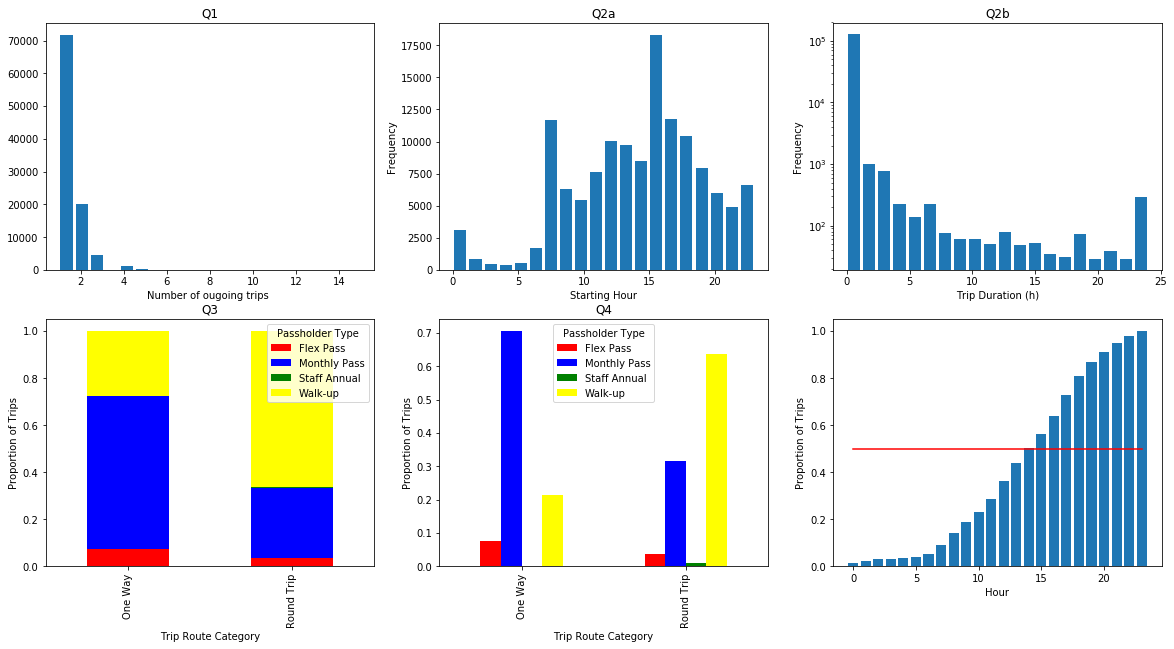

In [15]:
import matplotlib.pyplot as plt
% matplotlib inline
from collections import Counter
from datetime import datetime
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))

axes[0,0].hist(list(Counter(data_bikes["Start Time"].dropna(how="any")).values()),bins=20,rwidth = 0.8);
axes[0,0].set_xlabel("Number of ougoing trips ");
axes[0,0].set_title("Q1");

time_start = [datetime.strptime(x,'%Y-%m-%dT%X').hour for x in data_bikes["Start Time"]]
axes[0,1].hist(time_start,bins=20,rwidth = 0.8);
axes[0,1].set_xlabel("Starting Hour");
axes[0,1].set_ylabel("Frequency");
axes[0,1].set_title("Q2a");

durations = data_bikes["Duration"]//3600
axes[0,2].hist(durations,bins=20,rwidth = 0.8,log=True);
axes[0,2].set_xlabel("Trip Duration (h)");
axes[0,2].set_ylabel("Frequency");
axes[0,2].set_title("Q2b");

x = (data_bikes.groupby(["Trip Route Category","Passholder Type",])).size().groupby(level=0).apply(
    lambda x:  x / x.sum()
)
x.unstack().plot(kind='bar',stacked=True, color=['red','blue','green','yellow'], grid=False,ax=axes[1,0]);
axes[1,0].set_ylabel("Proportion of Trips");
axes[1,0].set_title("Q3");

x = (data_bikes[[datetime.strptime(x,'%Y-%m-%dT%X').hour<12 for x in data_bikes["Start Time"]]].groupby(["Trip Route Category","Passholder Type",])).size().groupby(level=0).apply(
    lambda x:  x / x.sum()
)
x.unstack().plot(kind='bar',stacked=False, color=['red','blue','green','yellow'], grid=False,ax=axes[1,1]);
axes[1,1].set_ylabel("Proportion of Trips");
axes[1,1].set_title("Q4");

sta_hr = Counter([datetime.strptime(x,'%Y-%m-%dT%X').hour for x in data_bikes["Start Time"]])
df = pd.DataFrame.from_dict(list(sta_hr.items()))
df.columns = ['Hour', 'Trips']
df.set_index('Hour',inplace=True)
df.sort_index(inplace=True)
new_df = (df.cumsum()/df.sum()).reset_index()
axes[1,2].bar(new_df.Hour,new_df.Trips,);
axes[1,2].plot([0,23],[0.5,0.5],"red")
axes[1,2].set_xlabel("Hour");
axes[1,2].set_ylabel("Proportion of Trips");


# Last Q

In [7]:
data_bikes["Hour Category"] = [int(datetime.strptime(x,'%Y-%m-%dT%X').hour<=14) for x in data_bikes["Start Time"]]

In [259]:
from matplotlib.colors import ListedColormap
x = (data_bikes[[datetime.strptime(x,'%Y-%m-%dT%X').hour<12 for x in data_bikes["Start Time"]]].groupby(["Trip Route Category","Passholder Type",])).size().groupby(level=0).apply(
    lambda x:  x / x.sum()
)
x.unstack().plot(kind='bar',stacked=True, color=['red','blue','green','yellow'], grid=False);
plt.ylabel("Proportion of Trips");

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category,Hour Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.23721,1912818,Round Trip,1
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.23721,1919661,Round Trip,1
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.24156,1933383,Round Trip,1
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,1944197,Round Trip,1
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.25588,1940317,Round Trip,1


In [10]:
from matplotlib.colors import ListedColormap
x = (data_bikes.groupby(["Trip Route Category","Hour Category","Passholder Type",])).size().groupby(level=0).apply(
    lambda x:  x / x.sum()
)
x.unstack()

Passholder Type                    Flex Pass  Monthly Pass  Staff Annual  \
Trip Route Category Hour Category                                          
One Way             0               0.036902      0.319035      0.000970   
                    1               0.038607      0.328998      0.001530   
Round Trip          0               0.016817      0.133359      0.001877   
                    1               0.020962      0.161674      0.004615   

Passholder Type                     Walk-up  
Trip Route Category Hour Category            
One Way             0              0.142458  
                    1              0.131501  
Round Trip          0              0.333281  
                    1              0.327415

__\* Briefly explain your approach for every query here \*__